# Augmentations and Gradcam - Assignment 09
> Nikhil Shrimali

## Albumentations
In this Assignment, I have applied Albumentations as my default Augmentations, some of the noteworthy implemtations are
- Cutouts
- Elastic Transforms
- RandomBrightnessContrast
- RandomBrightnessContrast
- ElasticTransform
- ShiftScaleRotate
- RandomCrop

This has huge regularizing effect on the model, hence kept dropout to 0%.

The training accuracy has maxed out to 62% due to huge regulaziations by Albumentations, but the testing accuracy is holding good at ~88%.

I have manually changes Learning Rates. For first 20 epochs I have used 0.01 as LR after that I have trained the model for another 8 epochs with an LR to 0.001.as_integer_ratio

## Gradcam
A noteworthy implemtation in this exercize if the implementaion of GradCam to get the answers from model about what exactly it is learning. Gone are the days when deep neural networks were a black box to us.

To have some answers from the model, we can pass the layers to the models, in image attached in this file, I have plotted GradCam for each of the layer in the network.


# Cloning <a  href='https://github.com/nikshrimali/shrinkai'>SHRINKai</a>

In [1]:
# Cloning shrinkai
# !git clone https://github.com/nikshrimali/shrinkai

# Importing Libraries

In [2]:

import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau


from shrinkai.model.model_test import model_testing
from shrinkai.model.model_train import model_training

from shrinkai.data_process.getdata import GetCIFAR10_TrainData
from shrinkai.data_process.misclassified_data import *

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

device = "cuda" if torch.cuda.is_available else "cpu"
print(device)

from shrinkai.model.gradcam import gen_gradcam

cuda


In [1]:
from shrinkai.data_process.albumentation import *

trainset = datasets.CIFAR10('./data', train=True, download=True, transform=cifar_alb_trainData())
testset = datasets.CIFAR10('./data', train=False, download=True, transform=cifar_alb_testdata())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


# Importing Model

In [3]:
from shrinkai.model.resnetmodel8 import ResNet18
model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=2, threshold=0.001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=True)
scheduler = StepLR(optimizer, step_size=25, gamma=0.1)

train_acc = []
train_losses = []
test_acc = []
test_losses = []
EPOCHS = 20
model_path = 'latest_model.h5'

import os

print(f'Starting Training for {EPOCHS} Epochs')
try:
    os.remove(model_path) # deleting the existing file
except:
    pass

for i in range(EPOCHS):
    print(f'EPOCHS : {i}')
    model_training(model, device, trainloader, optimizer, train_acc, train_losses, l1_loss=False)
    torch.save(model.state_dict(), model_path)
    scheduler.step()
    misclassified = model_testing(model, device, testloader, test_acc, test_losses)

  0%|          | 0/391 [00:00&lt;?, ?it/s]Starting Training for 20 Epochs
EPOCHS : 0
Loss=0.9773061871528625 Batch_id=390 Accuracy=60.41: 100%|██████████| 391/391 [03:09&lt;00:00,  2.06it/s]
  0%|          | 0/391 [00:00&lt;?, ?it/s]
Test set: Average loss: 0.3914, Accuracy: 8721/10000 (87.21%)

EPOCHS : 1
Loss=0.9573268890380859 Batch_id=390 Accuracy=61.03: 100%|██████████| 391/391 [03:28&lt;00:00,  1.87it/s]
  0%|          | 0/391 [00:00&lt;?, ?it/s]
Test set: Average loss: 0.3816, Accuracy: 8747/10000 (87.47%)

EPOCHS : 2
Loss=1.073526382446289 Batch_id=390 Accuracy=61.72: 100%|██████████| 391/391 [03:31&lt;00:00,  1.85it/s]
  0%|          | 0/391 [00:00&lt;?, ?it/s]
Test set: Average loss: 0.3827, Accuracy: 8779/10000 (87.79%)

EPOCHS : 3
Loss=1.0880424976348877 Batch_id=390 Accuracy=61.87: 100%|██████████| 391/391 [03:04&lt;00:00,  2.12it/s]
  0%|          | 0/391 [00:00&lt;?, ?it/s]
Test set: Average loss: 0.3807, Accuracy: 8792/10000 (87.92%)

EPOCHS : 4
Loss=1.015850305557251 B

KeyboardInterrupt: 

# Model Performance

In [ ]:
plt.plot(train_acc)
plt.plot(test_acc)

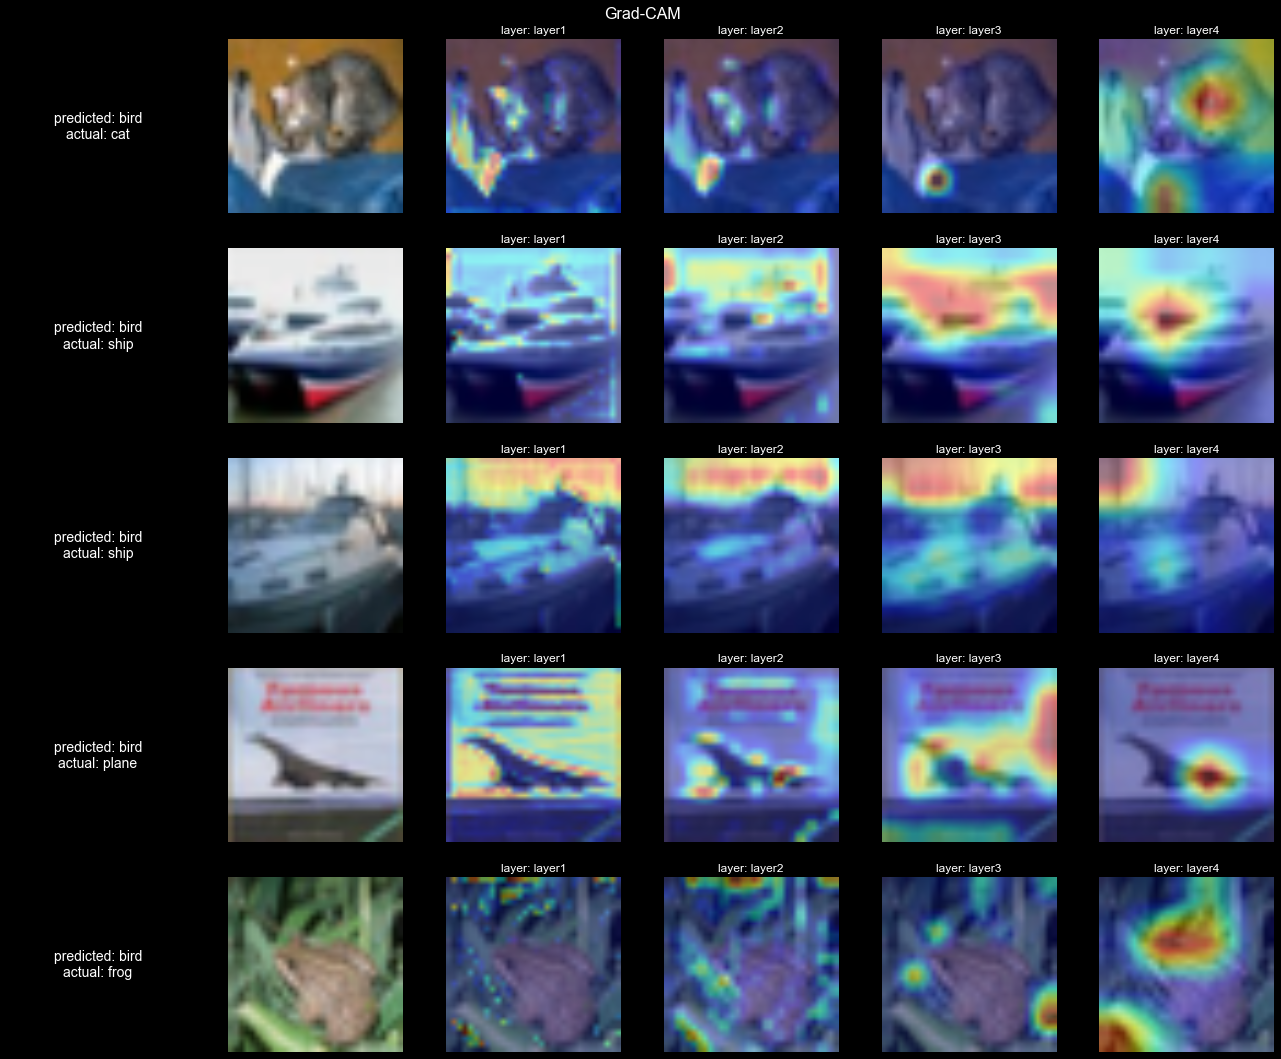

In [5]:
from shrinkai.model.gradcam.utils import plot_gradcam

class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
target_layers = ["layer1", "layer2", "layer3", "layer4"]
mean = (0.491, 0.482, 0.446)
std = (0.247, 0.243, 0.261)

plot_gradcam(target_layers, device, testloader, model, mean, std, class_names)

In [6]:
torch.save(model.state_dict(), "latestmodel.h5")